## Analysis of Multivariate data - NHANES case study 

In this notebook, I illustrate many basic techniques for exploring data using methods that enables us to understand multivariate relationships.
The statistical methods discussed here will make clear the multivariate methods and build on the univariate analysis notebook we created last week


find the explanations of the various methods in [Matplotlib](https://matplotlib.org/users/index.html) and [Seaborn](https://seaborn.pydata.org/tutorial.html)
and experiment with them and other plots to get a better sense of what can be done.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv("NHANES.csv")

### Quantitative Bivariate Data 

Bivariate data arise when every "unit of analysis" (e.g. a person in the NHANES dataset) is assessed with respect to two traits.
although we can consider more than two traits.

A scatterplot is a very common and easily-understood visualization of quantitative bivariate data. 
below we make a scatterplot of arm length against leg length 
arm length is plotted on the vertical axis and leg length is plotted on the horizontal axis.
In a scatterplot with more than around 100 points, "overplotting" becomes an issue.  This means that many points fall on top of each other in the plot, which obscures relationships in the middle of the distribution and over-emphasizes the extremes.  One way to mitigate overplotting is to use an "alpha" channel to make the points semi-transparent, as we have done below.

<AxesSubplot:xlabel='BMXLEG', ylabel='BMXARML'>

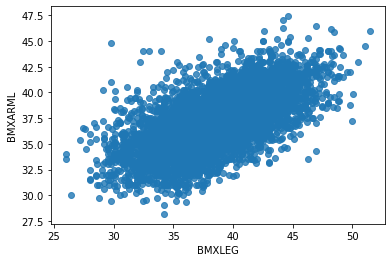

In [5]:
# scatterplot with no alpha channel
sns.regplot(x="BMXLEG", y="BMXARML", data = df, fit_reg=False)

<AxesSubplot:xlabel='BMXLEG', ylabel='BMXARML'>

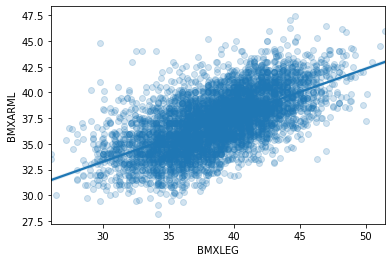

In [9]:
# scatterplot with alpha channel and fit reg(fit line)

sns.regplot(x="BMXLEG", y="BMXARML", data=df, fit_reg=True, scatter_kws={"alpha": 0.2})

Another way to avoid overplotting is to make a plot of the density of points.
darker colors indicate where a greater number of points fall. 
the two plot margins show the densities for the arm lengths and leg lengths separately while the plot in the center shows their density jointly
we also compute the Pearson correlation coefficient between both variables

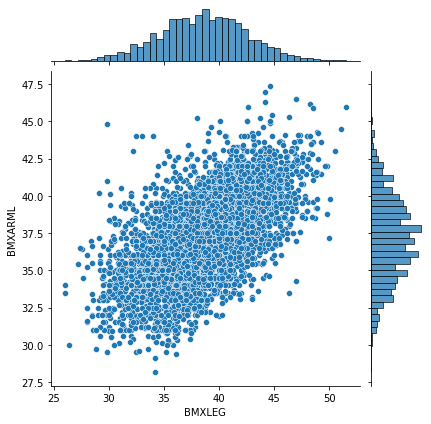

In [18]:
sns.jointplot(x="BMXLEG", y="BMXARML", data = df)

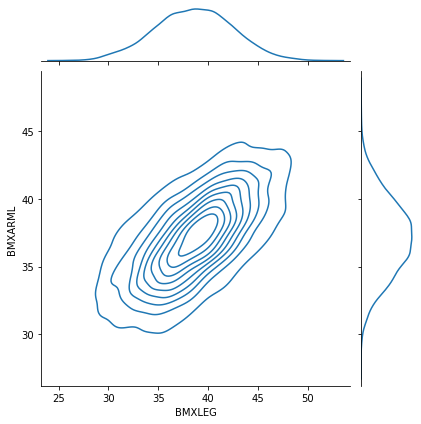

In [27]:
sns.jointplot(x="BMXLEG", y="BMXARML", kind="kde", data=df)

Text(0.1, 0.9, '$\\rho = -0.013, p = 0.341$')

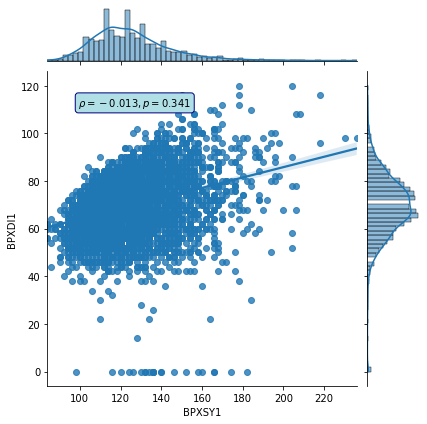

In [71]:
new_bps = df['BPXSY1'].dropna().sample(5000) # drop na and take sample
new_bpd2 = df['BPXDI1'].dropna().sample(5000) # drop na and take sample
g = sns.jointplot(x=new_bps, y=new_bpd2, kind='reg', data=df)
r, p = stats.pearsonr(new_bps, new_bpd2) # compute correlation
g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'}) # put the result of correlation on graph

### Heterogeneity and stratification

Most human characteristics are complex -- they vary by gender, age, ethnicity and other factors. this type of variation is often refered to as heterogeneity 
to handle heterogeneity in data, we can stratify by relevant factors as we did in univariate analyses 


We stratify by gender and ethnicity below

/Users/daddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/daddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


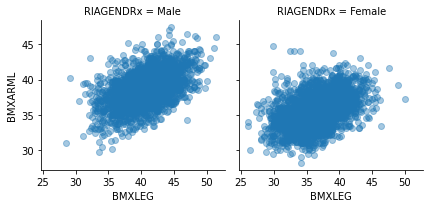

In [73]:
df['RIAGENDRx'] = df.RIAGENDR.replace({1: "Male", 2: "Female"})
sns.FacetGrid(df, col="RIAGENDRx").map(plt.scatter, 'BMXLEG', 'BMXARML', alpha=0.4).add_legend()

In [75]:
# calculating correlation for each column 

print(df.loc[df.RIAGENDRx=='Female', ["BMXLEG", "BMXARML"]].dropna().corr())
print(df.loc[df.RIAGENDRx=='Male', ["BMXLEG", "BMXARML"]].dropna().corr())

           BMXLEG   BMXARML
BMXLEG   1.000000  0.434703
BMXARML  0.434703  1.000000
           BMXLEG   BMXARML
BMXLEG   1.000000  0.505426
BMXARML  0.505426  1.000000


Next we look to stratifying the data by both gender and ethnicity.  This results in 2 x 5 = 10 total strata, since there are 2 gender strata and 5 ethnicity strata.

sns.FacetGrid helps you graph according to the stratas you have indicated.

/Users/daddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/daddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/daddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/daddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/daddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.

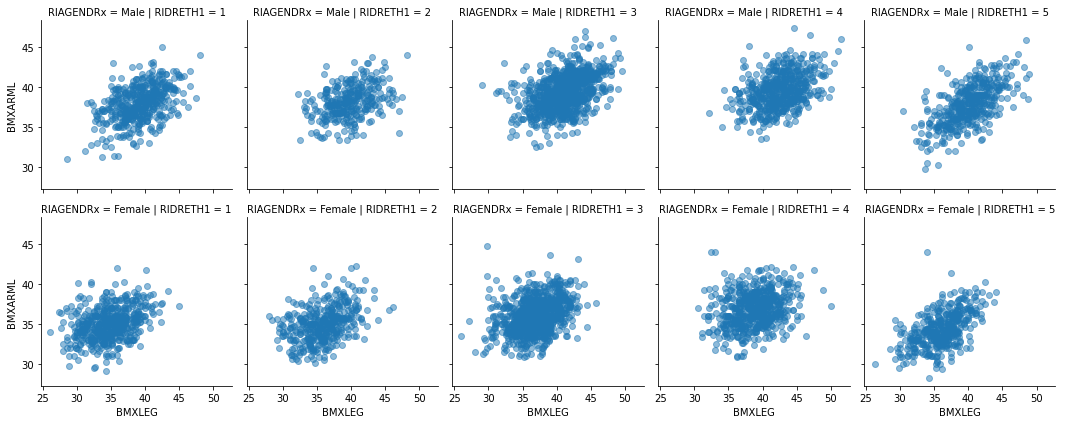

In [80]:
_ = sns.FacetGrid(df, col= "RIDRETH1", row="RIAGENDRx").map(plt.scatter, "BMXLEG", "BMXARML", alpha=0.5).add_legend()

### Categorical bivariate data

In this section we discuss some methods for working with bivariate data that are categorical.  We can start with a contingency table, which counts the number of people having each combination of two factors.  To illustrate, we will consider the NHANES variables for marital status and education level.

First, we create new versions of these two variables using text labels instead of numbers to represent the categories.  We also create a new data set that omits people who responded "Don't know" or who refused to answer these questions.

### Categorical bicariate data 

to work with categorcal bivariate data, we can start with a contingency table 
lets consider marital status and education level

In [82]:
#create new labels for the categorical data 

df["DMDEDUC2x"] = df.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
df["DMDMARTLx"] = df.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})



#omitting people who do not know or refused
db = df.loc[(df.DMDEDUC2x != "Don't know") & (df.DMDMARTLx != "Refused"), :]

In [84]:
db.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,RIAGENDRx,DMDEDUC2x,DMDMARTLx
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Male,College,Married
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Male,HS/GED,Divorced
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Male,HS/GED,Married
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,160.9,42.4,38.5,37.7,38.3,110.1,2.0,Female,College,Living w/partner
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Female,Some college/AA,Divorced


### Now we can create the table 

In [89]:
x = pd.crosstab(db.DMDEDUC2x, db.DMDMARTLx)
x

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,62,80,305,117,39,40
<9,52,66,341,65,43,88
College,120,85,827,253,22,59
HS/GED,127,133,550,237,40,99
Some college/AA,217,163,757,332,42,108


#### now we can normalize the data 

In [92]:
x.apply(lambda z: z/z.sum(), axis=1)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.096423,0.124417,0.474339,0.181960,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.099237,0.065649,0.134351
College,0.087848,0.062225,0.605417,0.185212,0.016105,0.043192
HS/GED,0.107083,0.112142,0.463744,0.199831,0.033727,0.083474
Some college/AA,0.134033,0.100679,0.467573,0.205065,0.025942,0.066708


### to add another view, lets add the gender variable 

In [93]:
# the folowwing line does these steps, reading the code from left to right:
# 1 group the data by every combination of gender, education and marital status
# 2 count the number of people in each cell using the size method
# 3 pivot the marital status results into the columns (using unstack)
# 4 fill any emptycells with 0
# 5 normalize the data by row

db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.113402          0.123711  0.412371   
          <9               0.091691          0.091691  0.424069   
          College          0.110181          0.055788  0.577406   
          HS/GED           0.121784          0.109777  0.413379   
          Some college/AA  0.148678          0.099119  0.418502   
Male      9-11             0.082386          0.125000  0.525568   
          <9               0.065359          0.111111  0.630719   
          College          0.063174          0.069337  0.636364   
          HS/GED           0.092869          0.114428  0.512438   
          Some college/AA  0.115331          0.102672  0.530239   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.171821   0.075601  0.103093  
          <9                    0.108883   0.088825  0.194842  
          College               0.182706   0.016736  0.057183  
          HS/GED                0.188679   0.041166  0.125214  
          Some college/AA       0.210352   0.031938  0.091410  
Male      9-11                  0.190341   0.048295  0.028409  
          <9                    0.088235   0.039216  0.065359  
          College               0.187982   0.015408  0.027735  
          HS/GED                0.210614   0.026534  0.043118  
          Some college/AA       0.198312   0.018284  0.035162

One factor behind the greater number of women who are divorced and widowed could be that women live longer than men.  To minimize the impact of this factor, we can recalculate the above table using a few narrow bands of ages. To simplify here, we collapse the marital status data to characterize people as being either "married" or "unmarried"  This allows us to focus on the marriage rate, which is a widely-studied variable in social science research.

There are a number of intriguing results here.  For example, the marriage rate seems to drop as college-educated people get older (e.g. 71% of college educated women between 49 and 50 are married, but only 65% of college educated women between 50 and 59 are married, an even larger drop occurs for men).  However in people with a HS/GED level of education, the marriage rate is higher for older people (although it is lower compared to the college educated sample).  There are a number of possible explanations for this, for example, that remarriage after divorce is less common among college graduates.

In [95]:
dx = db.loc[(db.RIDAGEYR >= 40) & (db.RIDAGEYR < 50)]
a = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

dx = db.loc[(db.RIDAGEYR >= 50) & (db.RIDAGEYR < 60)]
b = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

print(a.loc[:, ["Married"]])
print("")
print(b.loc[:, ["Married"]])

DMDMARTLx                   Married
RIAGENDRx DMDEDUC2x                
Female    9-11             0.581818
          <9               0.464286
          College          0.713376
          HS/GED           0.476744
          Some college/AA  0.509554
Male      9-11             0.574074
          <9               0.714286
          College          0.879310
          HS/GED           0.616279
          Some college/AA  0.625000

DMDMARTLx                   Married
RIAGENDRx DMDEDUC2x                
Female    9-11             0.490566
          <9               0.511111
          College          0.648649
          HS/GED           0.563107
          Some college/AA  0.496403
Male      9-11             0.666667
          <9               0.622642
          College          0.737374
          HS/GED           0.637255
          Some college/AA  0.555556


In [96]:
print(a.loc[:, ["Married"]].unstack())
print("")
print(b.loc[:, ["Married"]].unstack())

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.581818  0.464286  0.713376  0.476744        0.509554
Male       0.574074  0.714286  0.879310  0.616279        0.625000

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.490566  0.511111  0.648649  0.563107        0.496403
Male       0.666667  0.622642  0.737374  0.637255        0.555556


In [100]:
print(b)

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.075472          0.169811  0.490566   
          <9               0.200000          0.066667  0.511111   
          College          0.180180          0.018018  0.648649   
          HS/GED           0.155340          0.067961  0.563107   
          Some college/AA  0.230216          0.050360  0.496403   
Male      9-11             0.151515          0.075758  0.666667   
          <9               0.056604          0.094340  0.622642   
          College          0.080808          0.050505  0.737374   
          HS/GED           0.156863          0.078431  0.637255   
          Some college/AA  0.188034          0.059829  0.555556   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.132075   0.075472  0.056604  
   

### Mixed categorical and quantitative data

Another situation that commonly arises in data analysis is when we wish to analyze bivariate data consisting of one quantitative and one categorical variable. To illustrate methods that can be used in this setting, we consider the relationship between marital status and age in the NHANES data.  Specifically, we consider the distribution of ages for people who are currently in each marital status category.  A natural tool in this setting is side-by-side boxplots.  Here we see some unsurprising things -- widowed people tend to be older, and never-married people tend to be younger.

In [ ]:
plt.figure(figsize=(12, 4))
a = sns.boxplot(db.DMDMARTLx, db.RIDAGEYR)

/Users/daddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


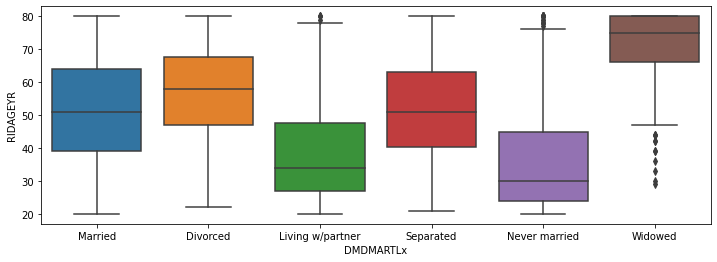

In [104]:
plt.figure(figsize=(12,4)) 
a = sns.boxplot(db.DMDMARTLx, db.RIDAGEYR)

When we have enough data, a "violinplot" gives a bit more insight into the shapes of the distributions compared to a traditional boxplot.  The violinplot below is based on the same data as the boxplot above.  We can see quite clearly that the distributions with low mean (living with partner, never married) are strongly right-skewed, while the distribution with high mean (widowed) is strongly left-skewed.  The other distributions have intermediate mean values, and are approximately symmetrically distributed.  Note also that the never-married distribution has a long shoulder, suggesting that this distributions includes many people who are never-married because they are young, and have not yet reached the ages when people typically marry, but also a substantial number of people will marry for the first time anywhere from their late 30's to their mid-60's.

/Users/daddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


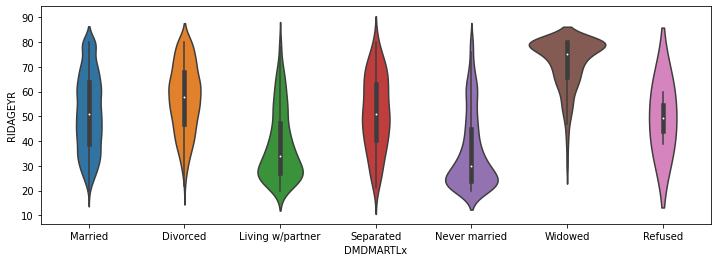

In [105]:
plt.figure(figsize=(12,4))
a = sns.violinplot(df.DMDMARTLx, df.RIDAGEYR)

In [108]:
pd.crosstab(df['RIDRETH1'], df['HIQ210']).apply(lambda x: x/x.sum(), axis=1)

HIQ210,1.0,2.0,9.0
RIDRETH1,,,
1,0.137982,0.857567,0.004451
2,0.128696,0.871304,0.000000
3,0.067354,0.931432,0.001214
4,0.108654,0.890385,0.000962
5,0.081761,0.915723,0.002516
